# Credit Card Fraud Detection - Capstone Project 2

## Problem Statement:

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
We have to build a classification model to predict whether a transaction is fraudulent or not.


## Data Understanding :

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
We have to build a classification model to predict whether a transaction is fraudulent or not.


## Followed Steps :

	Exploratory Data Analysis
	Data Cleaning
	Feature Engineering
	Model Selection
	Model Training
	Model Validation
	Model Deployment


In [1]:
# Importing python libraries :

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, auc, roc_auc_score, precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer
from imblearn.over_sampling import RandomOverSampler

from sklearn import model_selection

from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\ksimr\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Defaulting to user installation because normal site-packages is not writeable


## Exploratory Data Analysis

In [2]:
# Read csv File from locally stored file :

df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Examining the dataset imported :

df.shape

(284807, 31)

In [6]:
print("Number of columns: {}".format(df.shape[1]))
print("Number of rows: {}".format(df.shape[0]))

Number of columns: 31
Number of rows: 284807


In [7]:
# Check the numeric distribution of the data :

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Examining the data frame for the shape, datatypes, NUlls etc :

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Check the fraud/Non_Fraud related records :

df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
# % values of class :

(df.groupby('Class')['Class'].count()/df['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [11]:
# Check if any null values :

df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
# Finding the initial full correlation in the dataset :

# correlation matrix
cor = df.corr()
cor

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,3.777823e-12,-2.118614e-12,-1.733159e-13,-3.473231e-12,-1.306165e-13,-1.116494e-13,2.114527e-12,3.016285e-14,...,-3.276238e-12,2.281863e-12,-2.969746e-12,-1.029876e-12,1.144179e-12,1.835263e-12,7.624804e-12,-9.769215e-13,-0.227709,-0.101347
V2,-0.010593,3.777823e-12,1.000000e+00,2.325661e-12,-2.314981e-12,-1.831952e-12,9.438444e-13,5.403436e-12,2.133785e-14,3.238513e-13,...,2.280202e-12,-2.548560e-13,-4.856120e-12,6.431308e-13,-9.423730e-13,-4.129100e-13,-9.856545e-13,2.525513e-12,-0.531409,0.091289
V3,-0.419618,-2.118614e-12,2.325661e-12,1.000000e+00,2.046235e-13,-4.032993e-12,-1.574471e-13,3.405586e-12,-1.272385e-12,-6.812351e-13,...,6.736294e-13,-8.909339e-13,4.147209e-12,3.407636e-12,5.712956e-13,-2.577274e-12,-5.041444e-12,5.189109e-12,-0.210880,-0.192961
V4,-0.105260,-1.733159e-13,-2.314981e-12,2.046235e-13,1.000000e+00,-2.552389e-13,1.084041e-12,8.135064e-13,7.334818e-13,-7.143069e-13,...,-2.696370e-12,4.347776e-13,-4.160969e-12,-2.368743e-12,1.619944e-12,-3.043100e-13,-1.456066e-12,-2.832372e-12,0.098732,0.133447
V5,0.173072,-3.473231e-12,-1.831952e-12,-4.032993e-12,-2.552389e-13,1.000000e+00,-6.934789e-14,1.573956e-11,-2.038243e-12,-1.000756e-12,...,-1.751796e-12,7.095269e-13,3.616075e-12,-2.808776e-13,1.451126e-12,-1.896141e-13,-2.124559e-12,1.010196e-11,-0.386356,-0.094974
V6,-0.063016,-1.306165e-13,9.438444e-13,-1.574471e-13,1.084041e-12,-6.934789e-14,1.000000e+00,-2.798968e-12,-5.446480e-13,2.036743e-12,...,1.476858e-12,-1.144797e-12,-1.527842e-12,1.551854e-12,-2.723707e-12,3.351239e-12,1.481307e-12,-6.069227e-13,0.215981,-0.043643
V7,0.084714,-1.116494e-13,5.403436e-12,3.405586e-12,8.135064e-13,1.573956e-11,-2.798968e-12,1.000000e+00,5.528803e-12,5.088082e-13,...,2.788246e-12,-8.133209e-13,-4.293094e-12,-2.553518e-12,-7.406970e-13,-4.476467e-12,-1.328637e-11,2.958679e-13,0.397311,-0.187257
V8,-0.036949,2.114527e-12,2.133785e-14,-1.272385e-12,7.334818e-13,-2.038243e-12,-5.446480e-13,5.528803e-12,1.000000e+00,-2.243172e-12,...,-4.022440e-12,-2.679560e-12,9.013064e-13,-1.074365e-12,-3.268979e-12,1.043839e-12,-3.499804e-12,1.866598e-12,-0.103079,0.019875
V9,-0.008660,3.016285e-14,3.238513e-13,-6.812351e-13,-7.143069e-13,-1.000756e-12,2.036743e-12,5.088082e-13,-2.243172e-12,1.000000e+00,...,3.040326e-12,-7.467526e-13,-1.011003e-12,8.579072e-13,-1.590341e-12,-7.723547e-13,2.428930e-12,-1.406856e-12,-0.044246,-0.097733


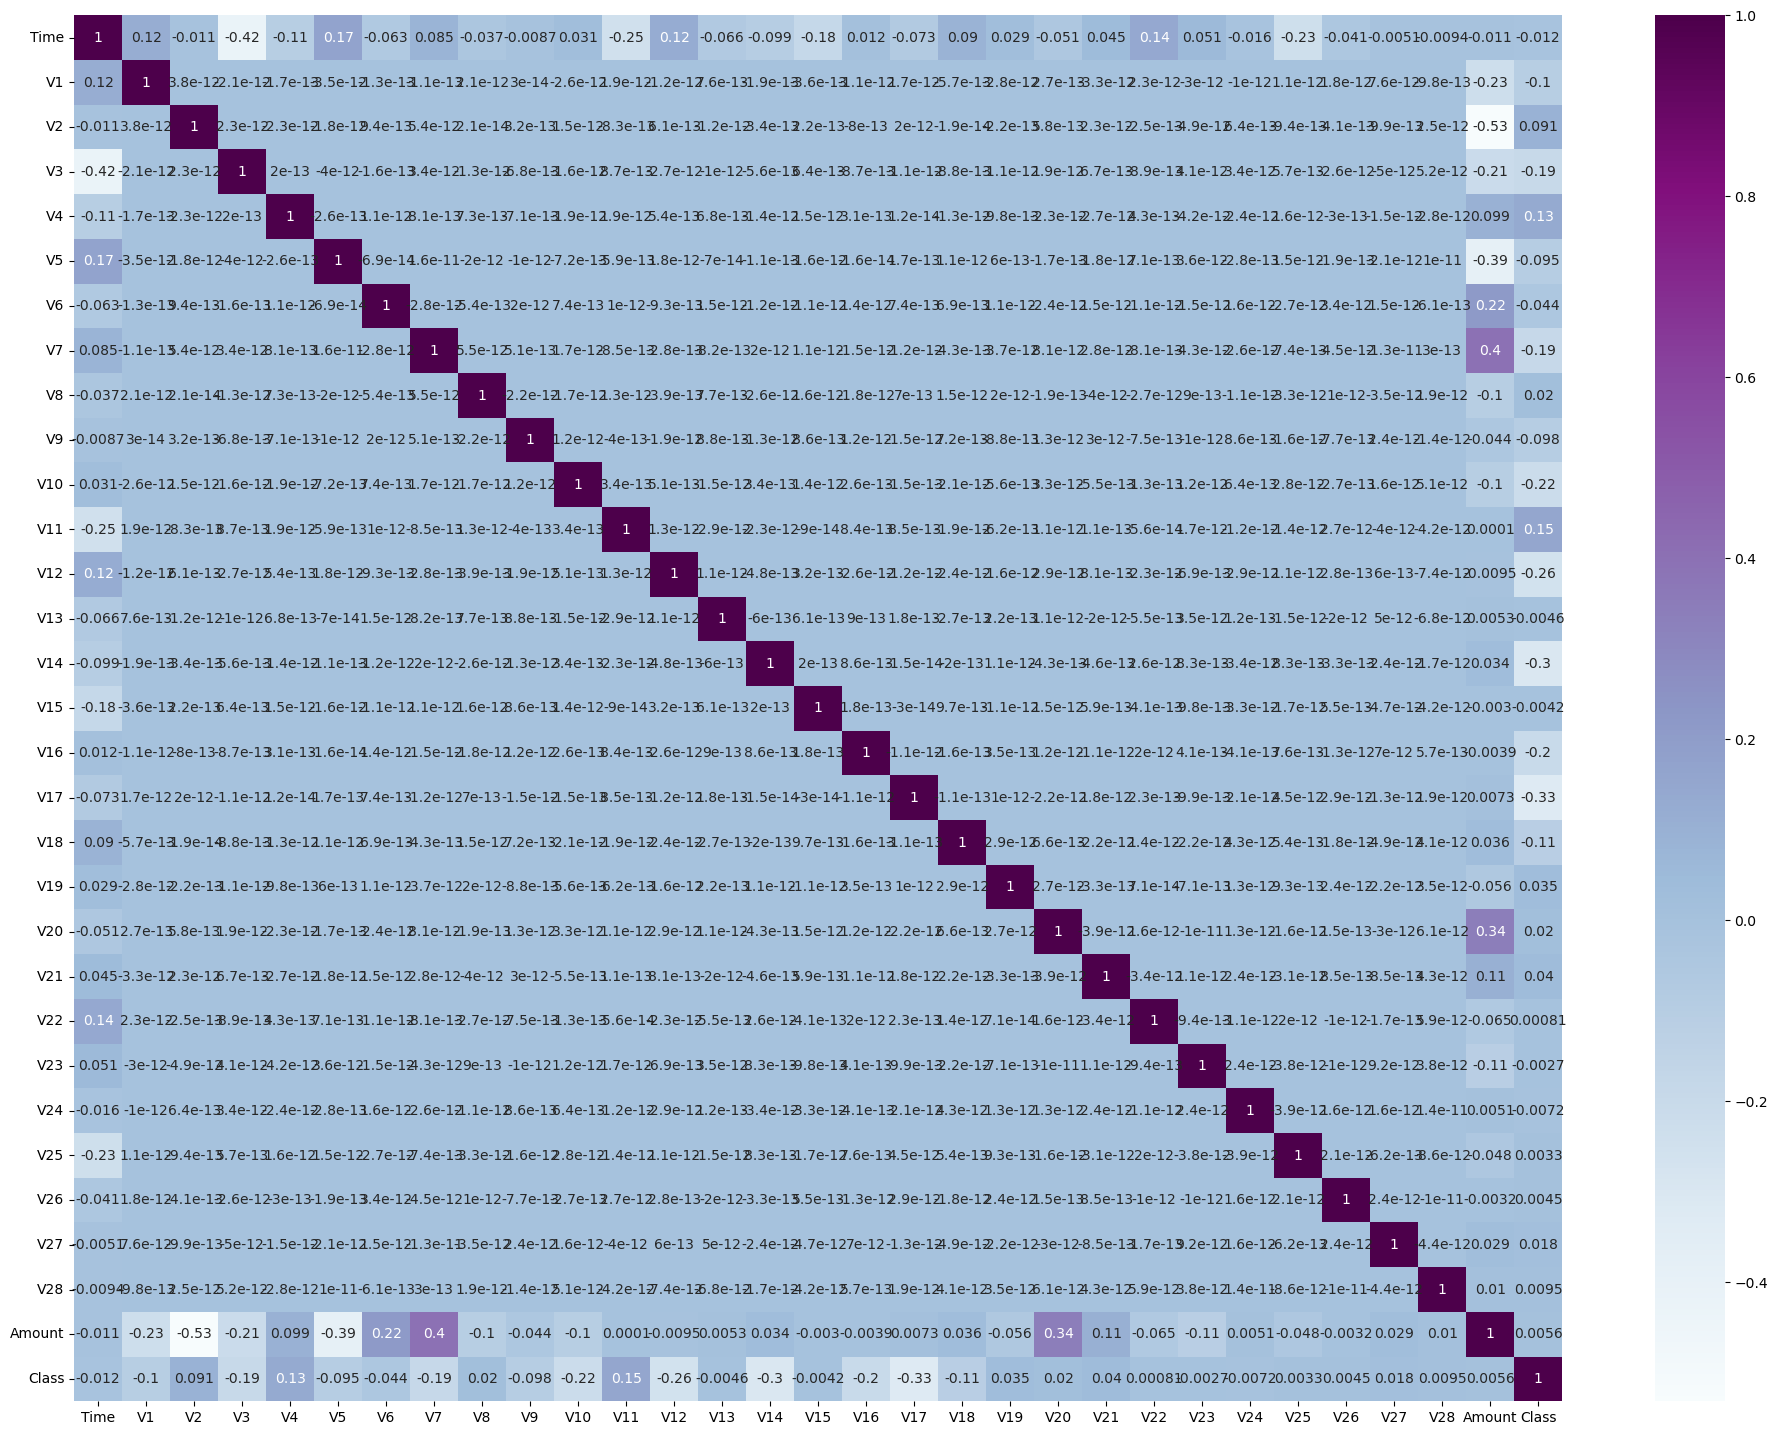

In [13]:
# Plotting correlations on a heatmap :

plt.figure(figsize=(24,18))
sns.heatmap(cor, cmap="BuPu", annot=True)
plt.show()

Here we will observe the distribution of our classes

In [14]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Conclusion : 0 - Normal
1 - Fraud

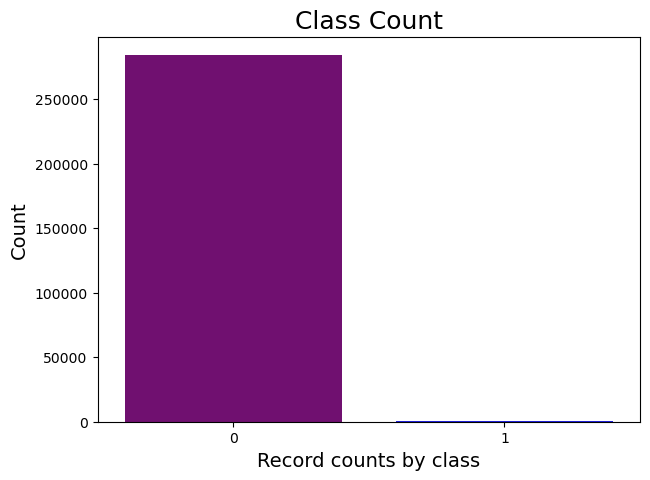

In [15]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations :

plt.figure(figsize=(7, 5))
sns.countplot(x='Class', data=df, palette={0: 'purple', 1: 'blue'})
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

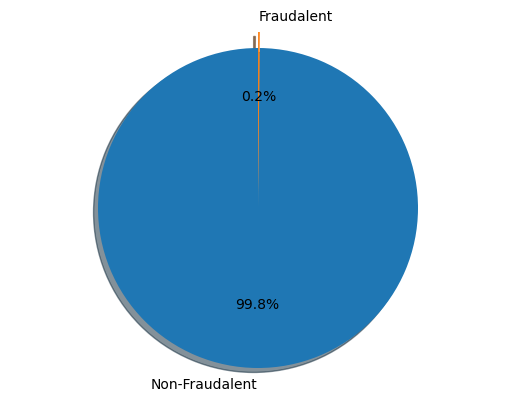

In [16]:
# Create a Pie chart for the percentage of fraudulent vs non-fraudulent transcations :

classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Conclusion : We have 492 fraudalent transactions out of 284807 total credit card transactions

Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. The model would achieve high accuracy as it would mostly predict majority class — transactions which are genuine in our example. To overcome this we will use other metrics for model evaluation such as ROC-AUC , precision and recall etc

In [17]:
# As time is given in relative fashion, we will need to use pandas.Timedelta which Represents a duration, the difference between two dates or times.

Delta_Time = pd.to_timedelta(df['Time'], unit='s')
#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

Text(0.5, 1.05, 'Time vs Class Distribution')

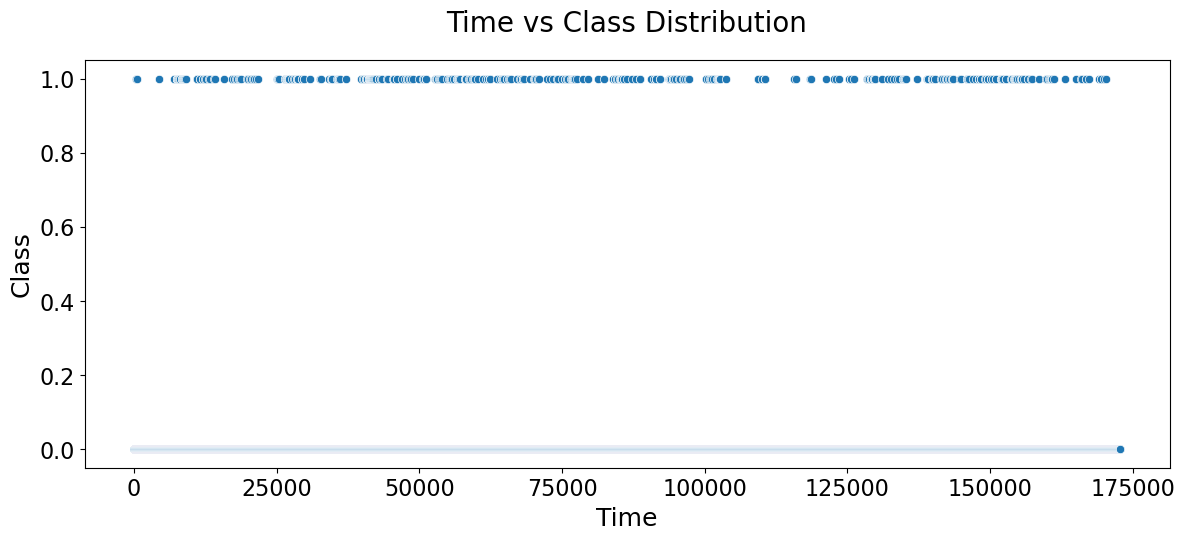

In [18]:
# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with time :

fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)

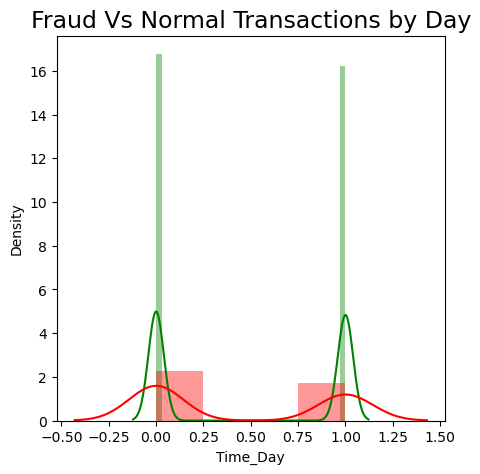

In [19]:
# The fraus Vs normal trasaction by day :

plt.figure(figsize=(5,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

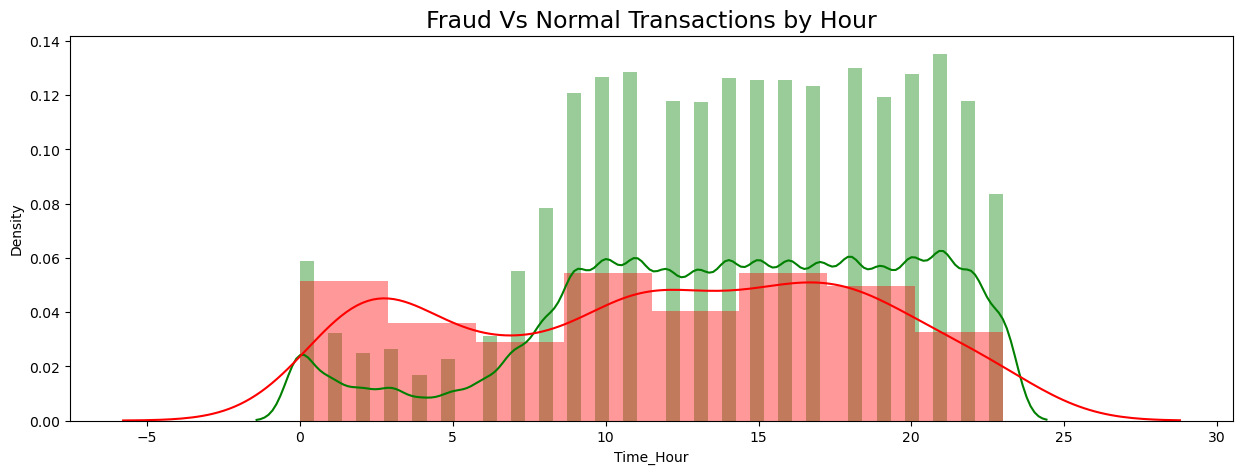

In [20]:
# The fraus Vs normal trasaction by hour :

plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

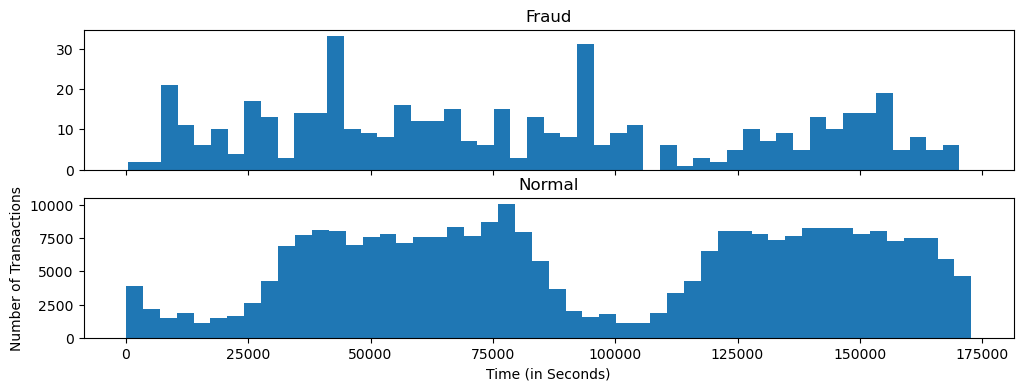

In [21]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [22]:
# To clearly the data of frauds and no frauds :

df_Fraud = df[df['Class'] == 1] 
df_Regular = df[df['Class'] == 0]

In [23]:
# Fraud Transaction Amount Statistics :

print(df_Fraud["Amount"].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [24]:
#Regular Transaction Amount Statistics :

print(df_Regular["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


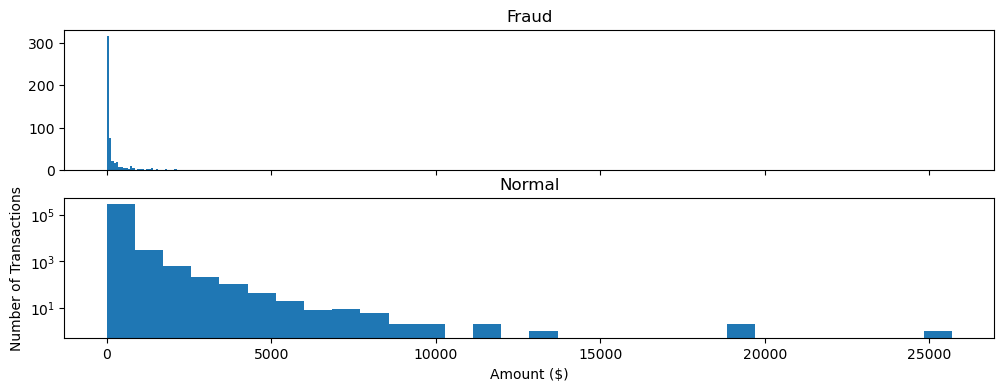

In [25]:
# Create a Histogram to observe the distribution of classes with Amount :

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [26]:
# Understanding more on the correlation in data :

print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)

# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]

# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


,Correlation
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413


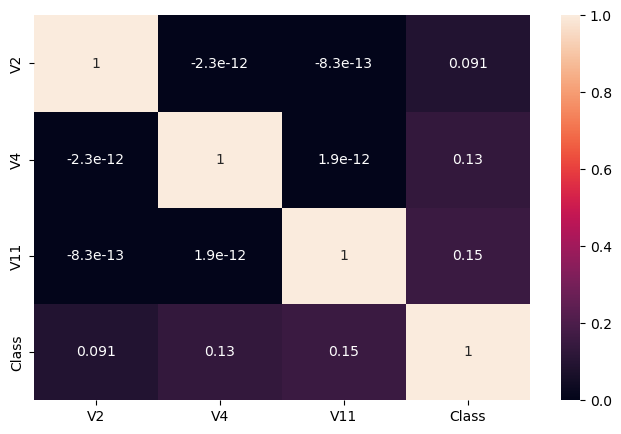

In [27]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable :

top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

#### Getting the correct datatype for date. 

In [28]:
# Drop unnecessary columns :

# As we have derived the Day/Hour/Minutes from the time column we will drop Time
df.drop('Time', axis = 1, inplace= True)

# Also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

In [29]:
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,0


In [30]:
df.tail(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
284797,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,...,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0,23
284798,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,...,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0,23
284799,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,...,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0,23
284800,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,...,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0,23
284801,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,...,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0,23
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,23


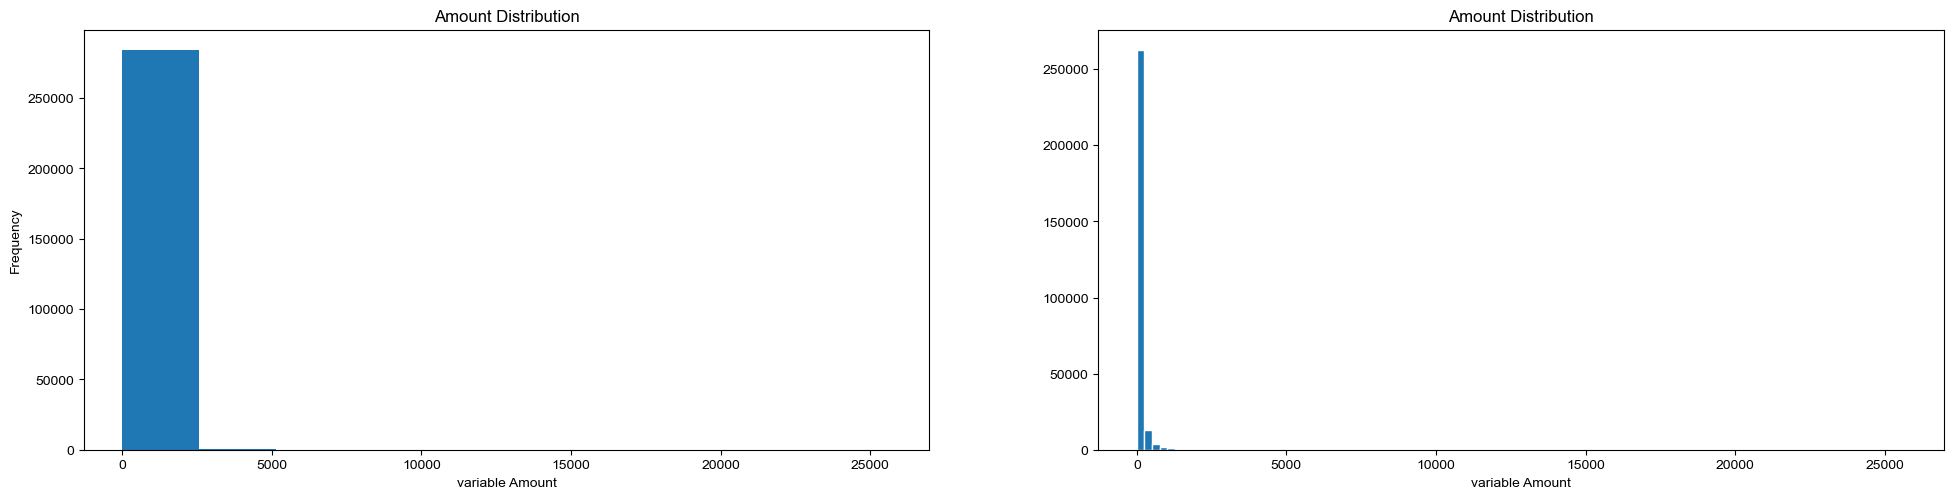

In [31]:
# Let's try to understand the Amount variable as it is not PCA transformed variable :

plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df['Amount'],bins=100)
plt.show()

## Splitting the data into train & test data

In [32]:
# Create x and y dataset for independent and dependent data :

y = df['Class']
x = df.drop(['Class'], axis=1)

In [33]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100, test_size=0.20)

In [35]:
# Preserve X_test & y_test to evaluate on the test data once you build the model :

print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


Plotting the distribution of a variable

In [36]:
cols = list(x.columns.values)

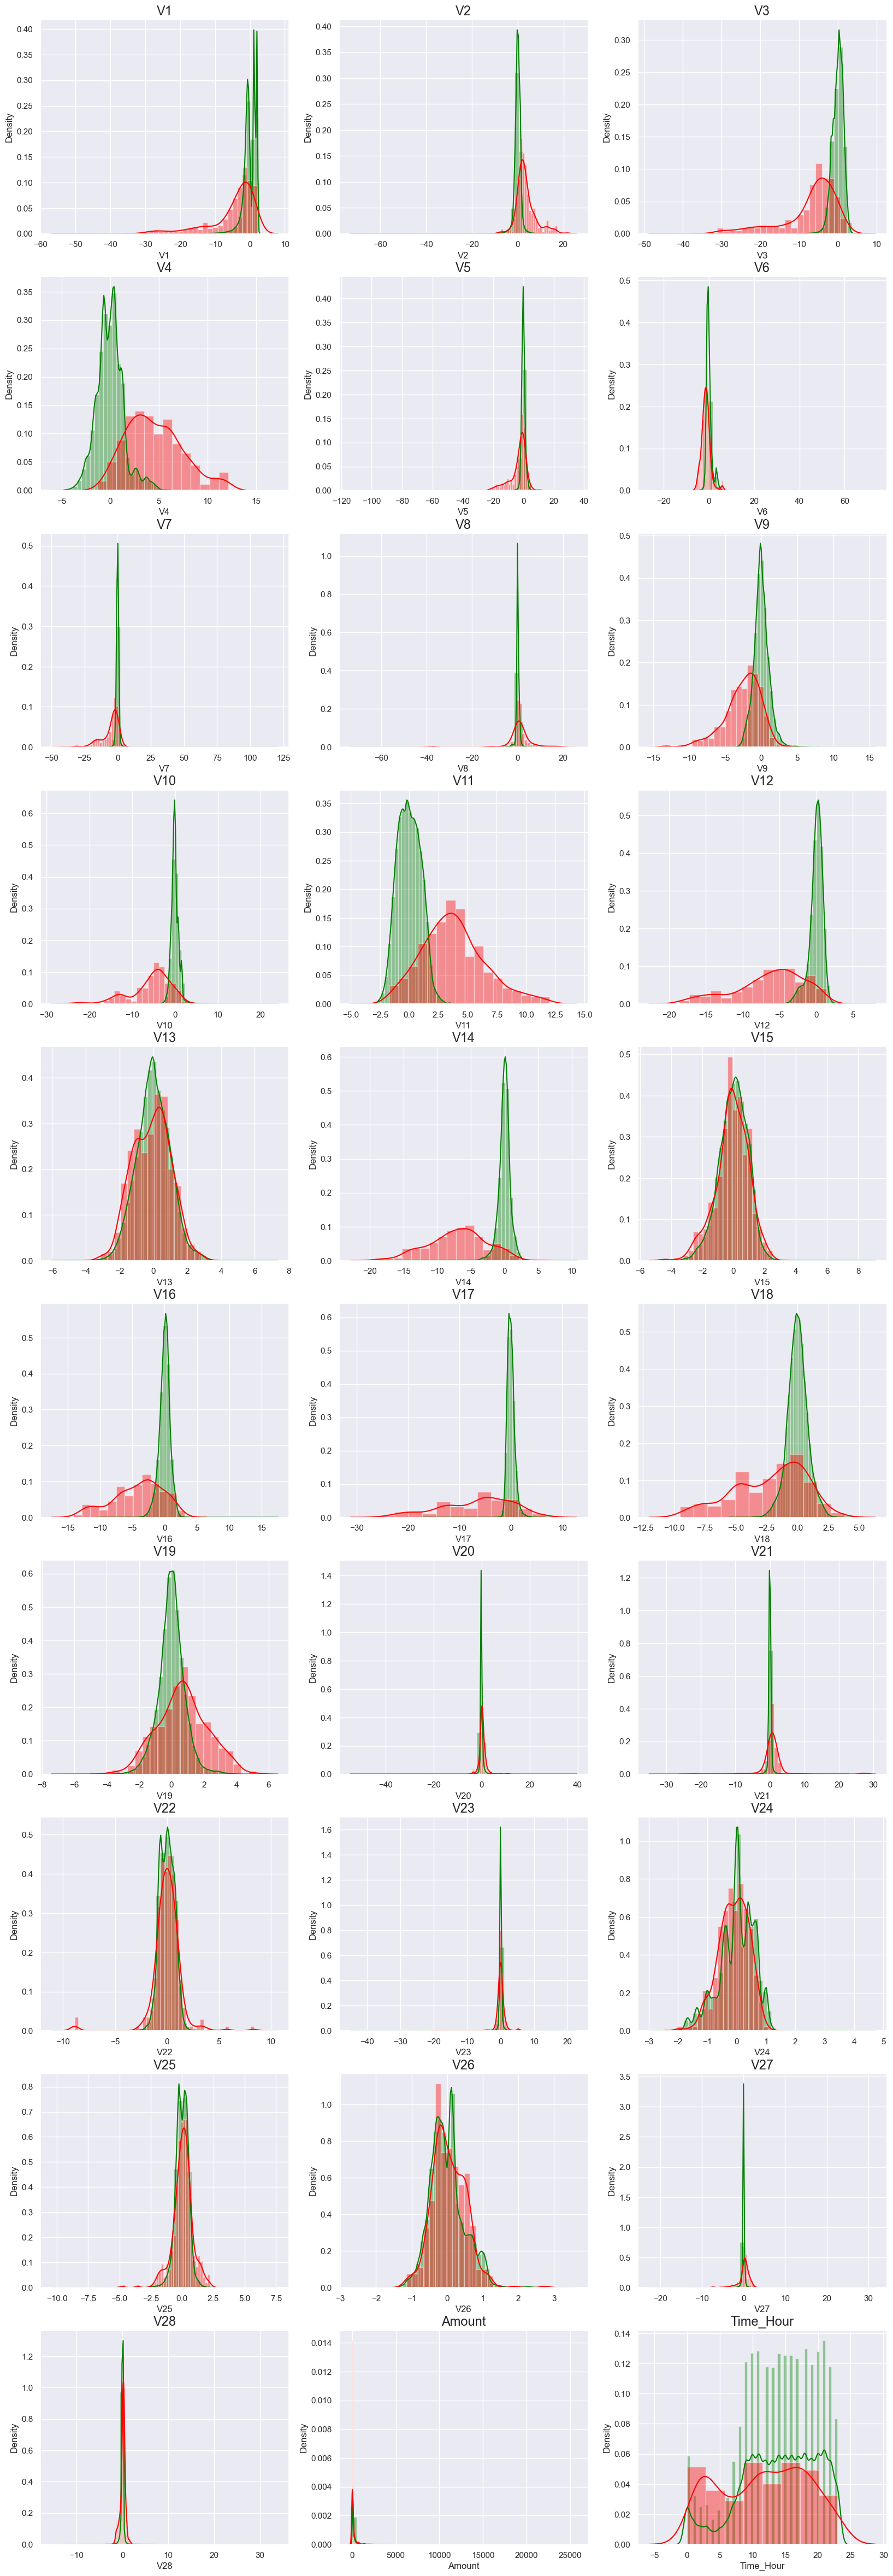

In [37]:
# Plot the histogram of a variable from the dataset to see the skewness :

normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(x[col][normal_records], color='green')
  sns.distplot(x[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

## Feature Scaling

In [38]:
# Instantiate the Scaler :
scaler = StandardScaler()

# Fit the data into scaler and transform :

x_train['Amount'] = scaler.fit_transform(x_train[['Amount']])

# Transform the test set :

x_test['Amount'] = scaler.transform(x_test[['Amount']])
x_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485,12
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859,4
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442,14
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410,19
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480,13


## With Undersampling

In [39]:
# Define Undersampler :

RUS = RandomUnderSampler(sampling_strategy=0.5)

# Fit and apply the transform :

x_Under, y_Under = RUS.fit_resample(x_train, y_train)

# Create Dataframe :

x_Under = pd.DataFrame(data=x_Under, columns=cols)
y_Under = pd.Series(data=y_Under, name='Class')

### Model Building

In [40]:
# Define a fuction to evaluate each model with oversample :

def evaluate_model_under(model, x_Under, y_Under, X_test, y_test):
    # Train the model
    model.fit(x_Under, y_Under)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='binary')  # Use 'micro' or 'macro' if you have a multi-class problem
    recall = recall_score(y_test, y_pred, average='binary')
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Print the results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall Score: {recall:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Print classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    print(f"\nClassification Report:\n")
    print(pd.DataFrame(report).transpose())

## Logistic Regression

In [41]:
log_reg_model = LogisticRegression()
log_reg_model.fit(x_Under, y_Under)

LogisticRegression()

Accuracy: 0.9837
F1 Score: 0.1500
Recall Score: 0.8542
ROC AUC: 0.9737


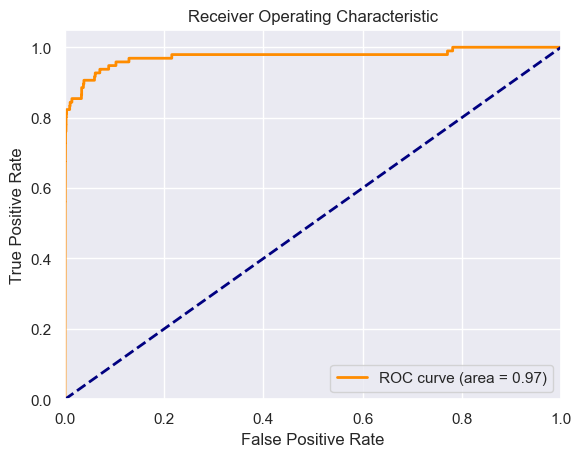

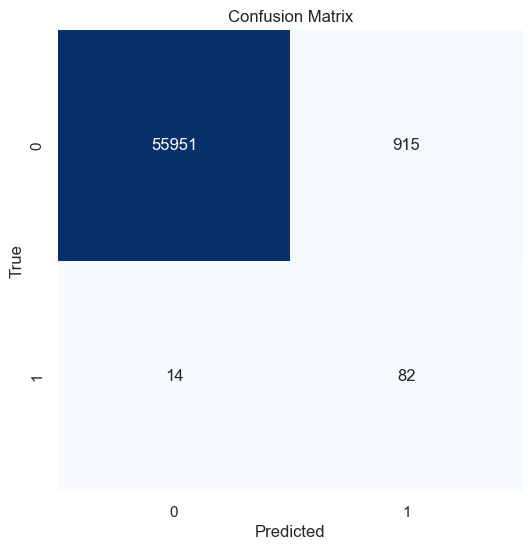


Classification Report:

              precision    recall  f1-score       support
0              0.999750  0.983910  0.991766  56866.000000
1              0.082247  0.854167  0.150046     96.000000
accuracy       0.983691  0.983691  0.983691      0.983691
macro avg      0.540998  0.919038  0.570906  56962.000000
weighted avg   0.998204  0.983691  0.990348  56962.000000


In [42]:
evaluate_model_under(log_reg_model, x_Under, y_Under, x_test, y_test)

## Random Forest

In [43]:
# ran_for_model = RandomForestClassifier()
# ran_for_model.fit(x_Under, y_Under)

In [44]:
# evaluate_model_under(ran_for_model, x_Under, y_Under, x_test, y_test)

## Decision Tree

In [45]:
dec_tree_model = DecisionTreeClassifier()
dec_tree_model.fit(x_Under, y_Under)

DecisionTreeClassifier()

Accuracy: 0.9416
F1 Score: 0.0481
Recall Score: 0.8750
ROC AUC: 0.9084


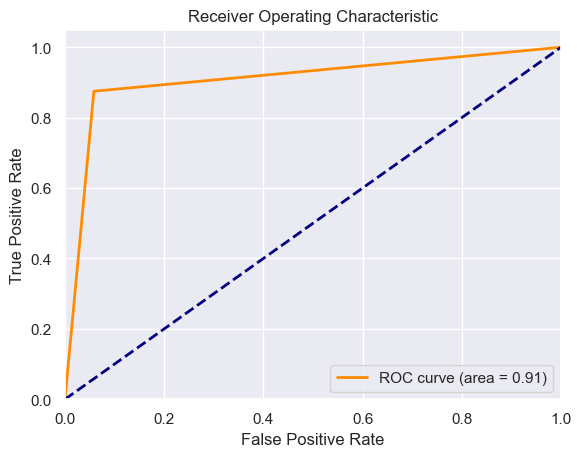

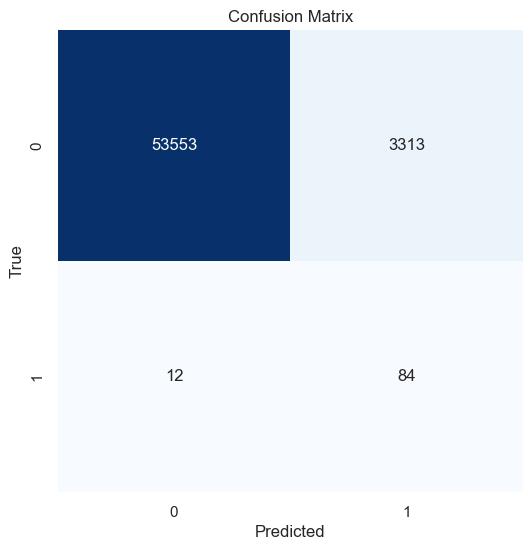


Classification Report:

              precision    recall  f1-score       support
0              0.999776  0.941740  0.969891  56866.000000
1              0.024728  0.875000  0.048096     96.000000
accuracy       0.941628  0.941628  0.941628      0.941628
macro avg      0.512252  0.908370  0.508993  56962.000000
weighted avg   0.998133  0.941628  0.968337  56962.000000


In [46]:
evaluate_model_under(dec_tree_model, x_Under, y_Under, x_test, y_test)

## Xgboost

In [47]:
xgboost_model = XGBClassifier()
xgboost_model.fit(x_Under, y_Under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 0.9830
F1 Score: 0.1465
Recall Score: 0.8646
ROC AUC: 0.9785


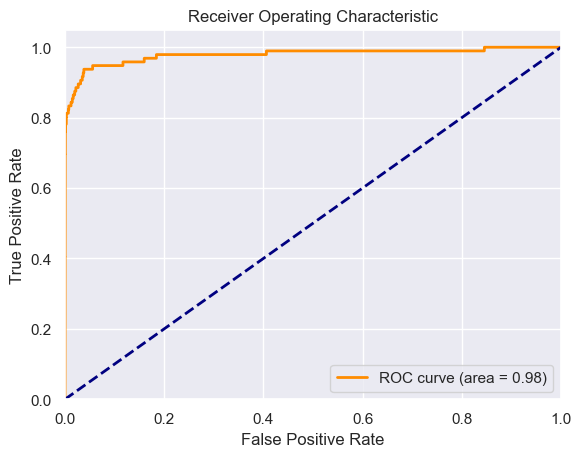

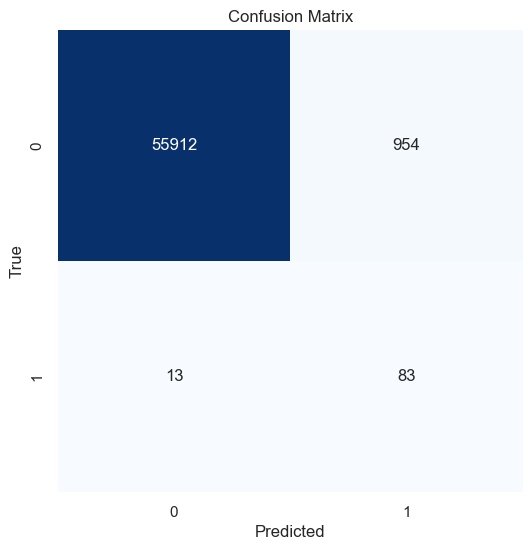


Classification Report:

              precision    recall  f1-score       support
0              0.999768  0.983224  0.991427  56866.000000
1              0.080039  0.864583  0.146514     96.000000
accuracy       0.983024  0.983024  0.983024      0.983024
macro avg      0.539903  0.923904  0.568970  56962.000000
weighted avg   0.998217  0.983024  0.990003  56962.000000


In [48]:
evaluate_model_under(xgboost_model, x_Under, y_Under, x_test, y_test)

In [49]:
def get_model_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return f1, accuracy, auc_roc, precision, recall

In [50]:
models = {
    "Logistic Regression": LogisticRegression(),
#     "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate each model, storing the results
model_summary = []

for name, model in models.items():
    model.fit(x_Under, y_Under)
    f1, accuracy, auc_roc, precision, recall = get_model_metrics(model, x_test, y_test)
    model_summary.append([name, f1, accuracy, auc_roc, precision, recall])

# Create a DataFrame for model summary
model_summary_df = pd.DataFrame(model_summary, columns=['Name', 'F1_score', 'Accuracy', 'AUC_ROC', 'Precision', 'Recall'])

In [51]:
model_summary_df = model_summary_df.reset_index(drop=True)
display(model_summary_df)

,Name,F1_score,Accuracy,AUC_ROC,Precision,Recall
0,Logistic Regression,0.150046,0.983691,0.973704,0.082247,0.854167
1,Decision Tree,0.049011,0.943454,0.904085,0.025220,0.864583
2,XGBoost,0.146514,0.983024,0.978497,0.080039,0.864583


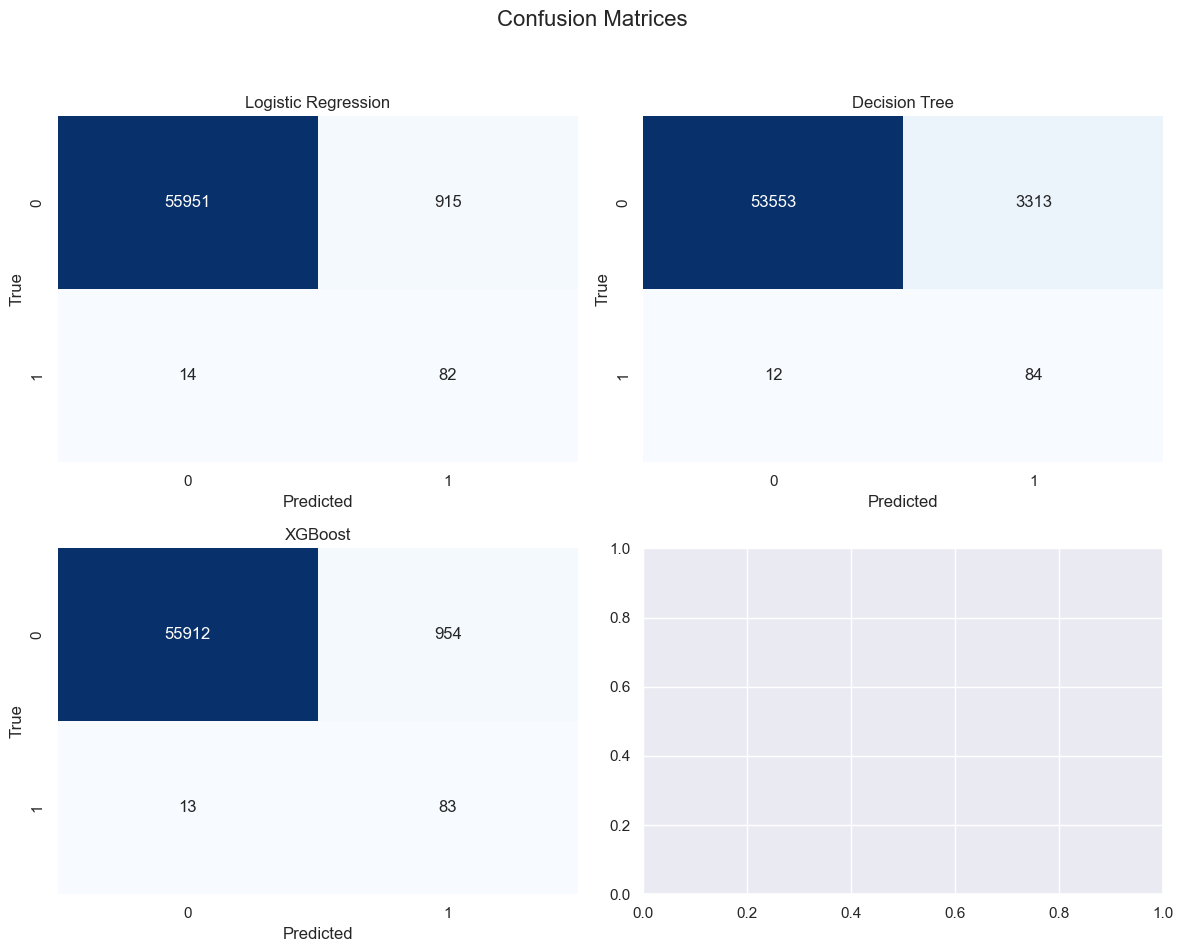

In [53]:
# All models are already defined and trained: log_reg_model, ran_for_model, dec_tree_model, xgboost_model :

# Confusion matrices
# Logistic Regression
lr_pred = log_reg_model.predict(x_test)
lr_cm = confusion_matrix(y_test, lr_pred)

# Decision Tree
dt_pred = dec_tree_model.predict(x_test)
dt_cm = confusion_matrix(y_test, dt_pred)

# XGBoost
xgb_pred = xgboost_model.predict(x_test)
xgb_cm = confusion_matrix(y_test, xgb_pred)

# # Random Forest
# rf_pred = ran_for_model.predict(x_test)
# rf_cm = confusion_matrix(y_test, rf_pred)

# Plotting confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Confusion Matrices', fontsize=16)

# Logistic Regression
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('True')

# Decision Tree
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('True')

# XGBoost
sns.heatmap(xgb_cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[1, 0])
axes[1, 0].set_title('XGBoost')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('True')

# # Random Forest
# sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[1, 1])
# axes[1, 1].set_title('Random Forest')
# axes[1, 1].set_xlabel('Predicted')
# axes[1, 1].set_ylabel('True')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle
plt.show()

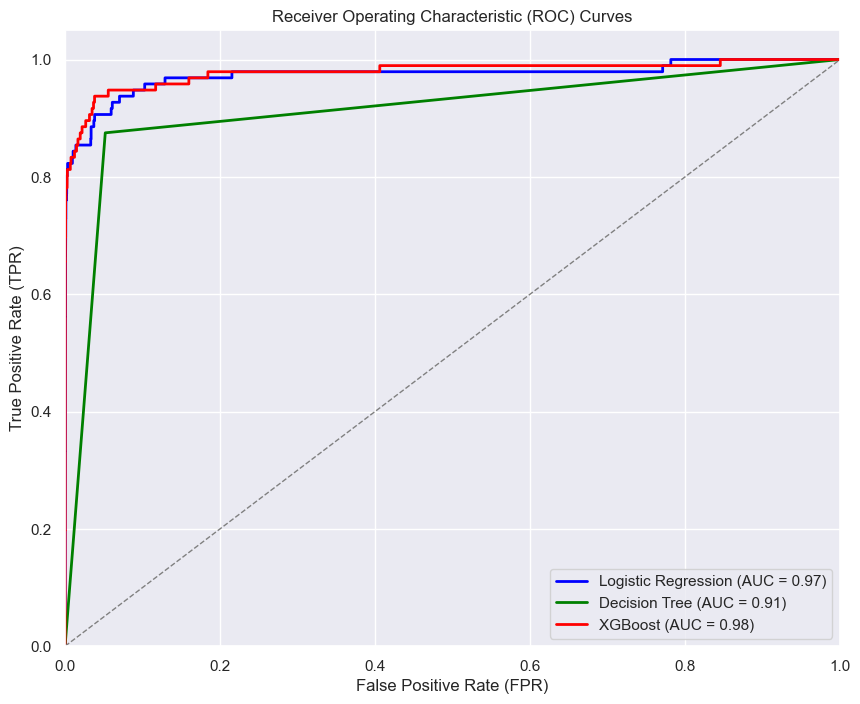

In [54]:
# # Initialized models
# log_reg_model = LogisticRegression()
# dec_tree_model = DecisionTreeClassifier()
# xgboost_model = XGBClassifier(
# ran_for_model = RandomForestClassifier()

# Fit models
log_reg_model.fit(x_Under, y_Under)
dec_tree_model.fit(x_Under, y_Under)
xgboost_model.fit(x_Under, y_Under)
# ran_for_model.fit(x_Under, y_Under)

# Predict probabilities for ROC curve
log_reg_probs = log_reg_model.predict_proba(x_test)[:, 1]
dec_tree_probs = dec_tree_model.predict_proba(x_test)[:, 1]
xgboost_probs = xgboost_model.predict_proba(x_test)[:, 1]
# ran_for_probs = ran_for_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_probs)
log_reg_roc_auc = auc(log_reg_fpr, log_reg_tpr)

dec_tree_fpr, dec_tree_tpr, _ = roc_curve(y_test, dec_tree_probs)
dec_tree_roc_auc = auc(dec_tree_fpr, dec_tree_tpr)

xgboost_fpr, xgboost_tpr, _ = roc_curve(y_test, xgboost_probs)
xgboost_roc_auc = auc(xgboost_fpr, xgboost_tpr)

# ran_for_fpr, ran_for_tpr, _ = roc_curve(y_test, ran_for_probs)
# ran_for_roc_auc = auc(ran_for_fpr, ran_for_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(log_reg_fpr, log_reg_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {log_reg_roc_auc:.2f})')
plt.plot(dec_tree_fpr, dec_tree_tpr, color='green', lw=2, label=f'Decision Tree (AUC = {dec_tree_roc_auc:.2f})')
plt.plot(xgboost_fpr, xgboost_tpr, color='red', lw=2, label=f'XGBoost (AUC = {xgboost_roc_auc:.2f})')
# plt.plot(ran_for_fpr, ran_for_tpr, color='purple', lw=2, label=f'Random Forest (AUC = {ran_for_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## With Oversampling

In [55]:
from imblearn.over_sampling import ADASYN

# Oversample the training data using ADASYN :

ada = ADASYN(sampling_strategy=0.5, random_state=42)
X_over, y_over = ada.fit_resample(x_train, y_train)

x_Over = pd.DataFrame(data=X_over, columns=cols)
y_Over = pd.Series(data=y_over, name='Class')

### Model Building

In [56]:
def evaluate_model_over(model, x_over, y_over, x_test, y_test):
    # Train the model
    model.fit(x_over, y_over)
    
    # Predict on test data
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='binary')  # Use 'micro' or 'macro' if you have a multi-class problem
    recall = recall_score(y_test, y_pred, average='binary')
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Print the results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall Score: {recall:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Print classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    print(f"\nClassification Report:\n")
    print(pd.DataFrame(report).transpose())

## Logistic Regression

In [57]:
log_reg_model = LogisticRegression()
log_reg_model.fit(x_Over, y_Over)

LogisticRegression()

Accuracy: 0.9559
F1 Score: 0.0655
Recall Score: 0.9167
ROC AUC: 0.9682


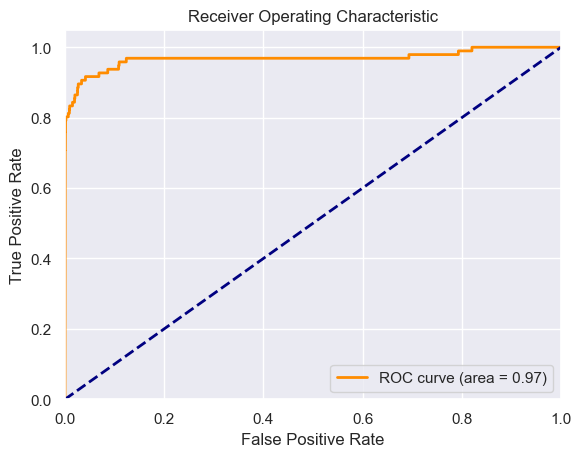

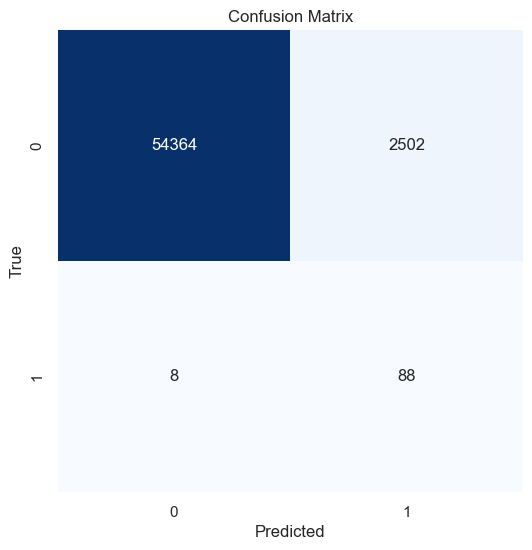


Classification Report:

              precision    recall  f1-score       support
0              0.999853  0.956002  0.977436  56866.000000
1              0.033977  0.916667  0.065525     96.000000
accuracy       0.955936  0.955936  0.955936      0.955936
macro avg      0.516915  0.936334  0.521480  56962.000000
weighted avg   0.998225  0.955936  0.975899  56962.000000


In [58]:
evaluate_model_over(log_reg_model, x_Over, y_Over, x_test, y_test)

## Random Forest

In [59]:
# ran_for_model = RandomForestClassifier()
# ran_for_model.fit(x_Over, y_Over)

In [60]:
# evaluate_model_over(ran_for_model, x_Over, y_Over, x_test, y_test)

## Decision Tree

In [61]:
dec_tree_model = DecisionTreeClassifier()
dec_tree_model.fit(x_Over, y_Over)

DecisionTreeClassifier()

Accuracy: 0.9977
F1 Score: 0.5166
Recall Score: 0.7292
ROC AUC: 0.8637


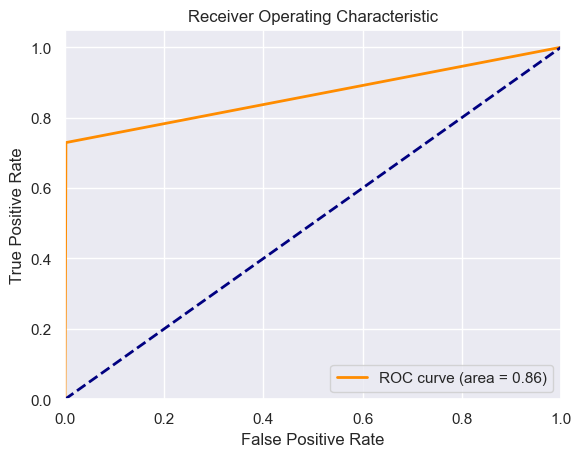

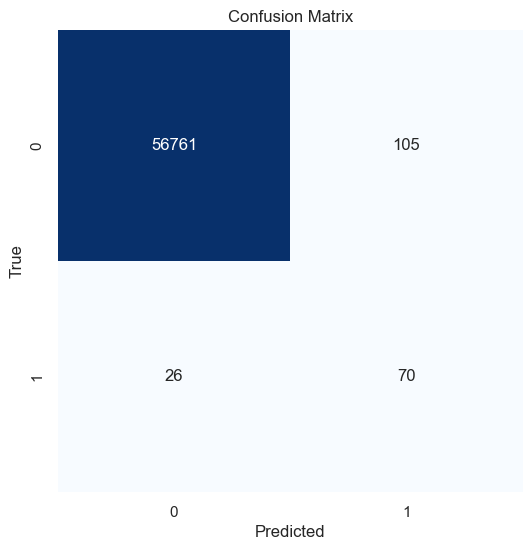


Classification Report:

              precision    recall  f1-score     support
0              0.999542  0.998154  0.998847  56866.0000
1              0.400000  0.729167  0.516605     96.0000
accuracy       0.997700  0.997700  0.997700      0.9977
macro avg      0.699771  0.863660  0.757726  56962.0000
weighted avg   0.998532  0.997700  0.998035  56962.0000


In [62]:
evaluate_model_over(dec_tree_model, x_Over, y_Over, x_test, y_test)

## Xgboost

In [63]:
xgboost_model = XGBClassifier()
xgboost_model.fit(x_Over, y_Over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 0.9991
F1 Score: 0.7440
Recall Score: 0.8021
ROC AUC: 0.9537


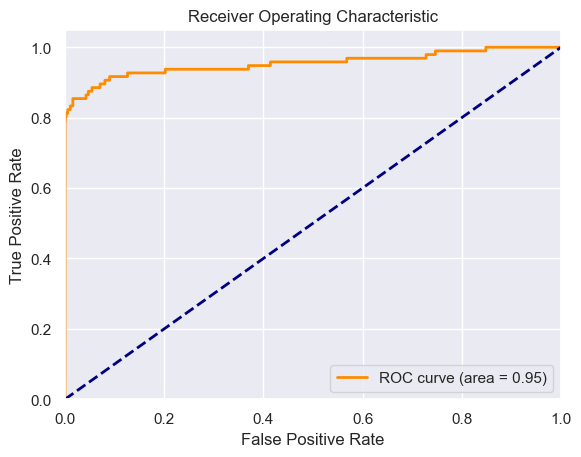

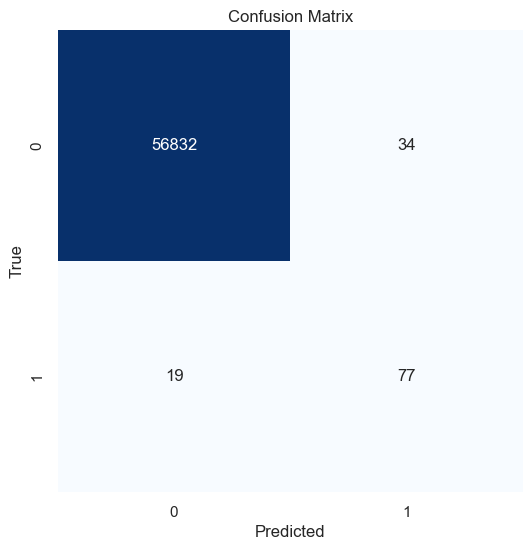


Classification Report:

              precision    recall  f1-score      support
0              0.999666  0.999402  0.999534  56866.00000
1              0.693694  0.802083  0.743961     96.00000
accuracy       0.999070  0.999070  0.999070      0.99907
macro avg      0.846680  0.900743  0.871748  56962.00000
weighted avg   0.999150  0.999070  0.999103  56962.00000


In [64]:
evaluate_model_over(xgboost_model, x_Over, y_Over, x_test, y_test)

NameError: name 'rf_cm' is not defined

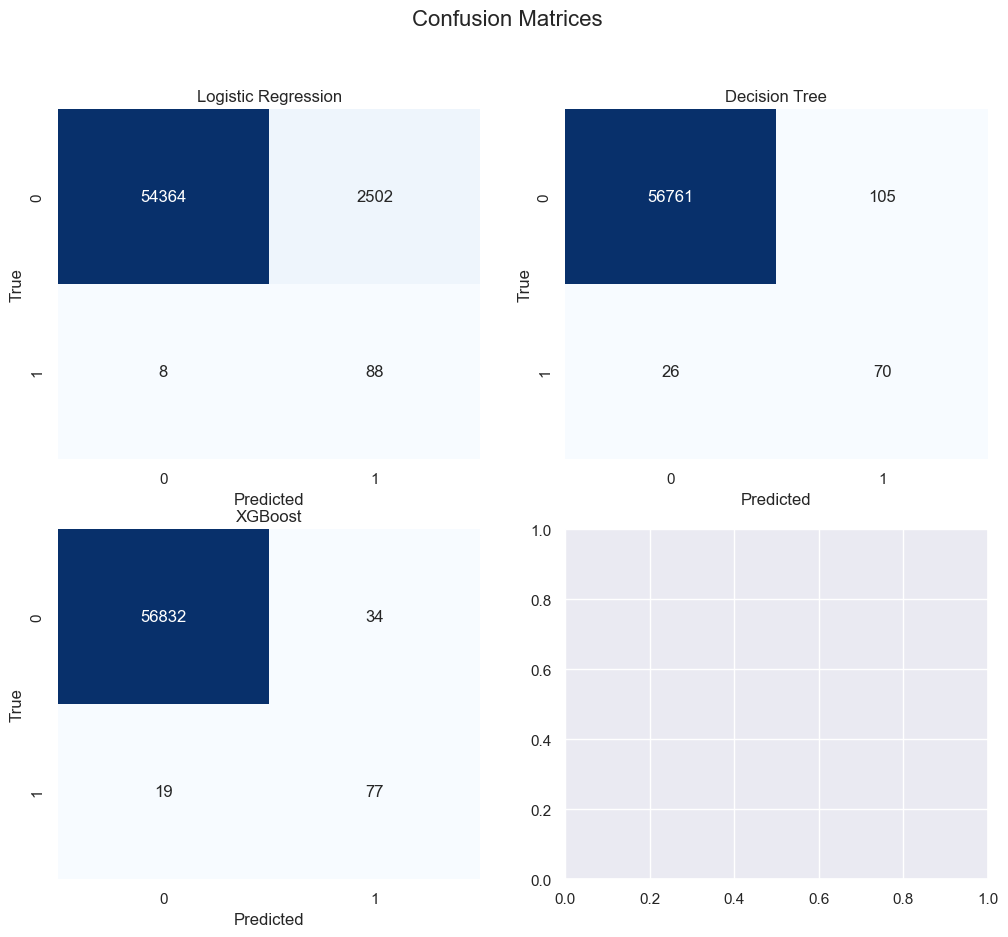

In [65]:
# All models are already defined and trained: log_reg_model, ran_for_model, dec_tree_model, xgboost_model :

# Confusion matrices
# Logistic Regression
lr_pred = log_reg_model.predict(x_test)
lr_cm = confusion_matrix(y_test, lr_pred)

# Decision Tree
dt_pred = dec_tree_model.predict(x_test)
dt_cm = confusion_matrix(y_test, dt_pred)

# XGBoost
xgb_pred = xgboost_model.predict(x_test)
xgb_cm = confusion_matrix(y_test, xgb_pred)

# # Random Forest
# rf_pred = ran_for_model.predict(x_test)
# rf_cm = confusion_matrix(y_test, rf_pred)

# Plotting confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Confusion Matrices', fontsize=16)

# Logistic Regression
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('True')

# Decision Tree
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('True')

# XGBoost
sns.heatmap(xgb_cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[1, 0])
axes[1, 0].set_title('XGBoost')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('True')

# Random Forest
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[1, 1])
axes[1, 1].set_title('Random Forest')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('True')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle
plt.show()

In [ ]:
# # Initialized models
# log_reg_model = LogisticRegression()
# dec_tree_model = DecisionTreeClassifier()
# xgboost_model = XGBClassifier(
# ran_for_model = RandomForestClassifier()

# Fit models
log_reg_model.fit(x_Over, y_Over)
dec_tree_model.fit(x_Over, y_Over)
xgboost_model.fit(x_Over, y_Over)
# ran_for_model.fit(x_Over, y_Over)

# Predict probabilities for ROC curve
log_reg_probs = log_reg_model.predict_proba(x_test)[:, 1]
dec_tree_probs = dec_tree_model.predict_proba(x_test)[:, 1]
xgboost_probs = xgboost_model.predict_proba(x_test)[:, 1]
# ran_for_probs = ran_for_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_probs)
log_reg_roc_auc = auc(log_reg_fpr, log_reg_tpr)

dec_tree_fpr, dec_tree_tpr, _ = roc_curve(y_test, dec_tree_probs)
dec_tree_roc_auc = auc(dec_tree_fpr, dec_tree_tpr)

xgboost_fpr, xgboost_tpr, _ = roc_curve(y_test, xgboost_probs)
xgboost_roc_auc = auc(xgboost_fpr, xgboost_tpr)

# ran_for_fpr, ran_for_tpr, _ = roc_curve(y_test, ran_for_probs)
# ran_for_roc_auc = auc(ran_for_fpr, ran_for_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(log_reg_fpr, log_reg_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {log_reg_roc_auc:.2f})')
plt.plot(dec_tree_fpr, dec_tree_tpr, color='green', lw=2, label=f'Decision Tree (AUC = {dec_tree_roc_auc:.2f})')
plt.plot(xgboost_fpr, xgboost_tpr, color='red', lw=2, label=f'XGBoost (AUC = {xgboost_roc_auc:.2f})')
# plt.plot(ran_for_fpr, ran_for_tpr, color='purple', lw=2, label=f'Random Forest (AUC = {ran_for_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [66]:
models = {
    "Logistic Regression": LogisticRegression(),
#     "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate each model, storing the results
model_summary = []

for name, model in models.items():
    # Evaluate on oversampled data
    model.fit(x_Over, y_Over)
    f1, accuracy, auc_roc, precision, recall = get_model_metrics(model, x_test, y_test)
    model_summary.append([f'{name} (Over)', f1, accuracy, auc_roc, precision, recall])
    
    # Evaluate on undersampled data
    model.fit(x_Under, y_Under)
    f1, accuracy, auc_roc, precision, recall = get_model_metrics(model, x_test, y_test)
    model_summary.append([f'{name} (Under)', f1, accuracy, auc_roc, precision, recall])
    
# Create a DataFrame for model summary
model_summary_df = pd.DataFrame(model_summary, columns=['Name', 'F1_score', 'Accuracy', 'AUC_ROC', 'Precision', 'Recall'])

In [67]:
model_summary_df = model_summary_df.reset_index(drop=True)
display(model_summary_df)

,Name,F1_score,Accuracy,AUC_ROC,Precision,Recall
0,Logistic Regression (Over),0.065525,0.955936,0.968170,0.033977,0.916667
1,Logistic Regression (Under),0.150046,0.983691,0.973704,0.082247,0.854167
2,Decision Tree (Over),0.512821,0.997665,0.863643,0.395480,0.729167
3,Decision Tree (Under),0.048041,0.941558,0.908335,0.024699,0.875000
4,XGBoost (Over),0.743961,0.999070,0.953739,0.693694,0.802083
5,XGBoost (Under),0.146514,0.983024,0.978497,0.080039,0.864583


"Over" in Results - Oversampled & "Under" in Results - Undersampled 

#### Overall conclusion after running models on Oversampled & Unsampled data
##### Given the metrics provided, Random Forest (Over) appears to be the best overall performer. 
##### Since Random Forest is taking a lot of time Therefore, I've choose xgboost for hyperperameter & deployment

## Hyperperamter Tuning on XGBoost (Over)

In [100]:
# Define a reduced parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
}

# Create a base model
rf = XGBClassifier()

# Instantiate the randomized search model with fewer iterations and CV folds
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=20, cv=2, n_jobs=-1, verbose=2, scoring='f1', random_state=42)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best F1 score: ", random_search.best_score_)

# Get the best estimator
best_xgb = random_search.best_estimator_

# Use the best model to predict the test set
xgb_best_pred = best_xgb.predict(X_test)

# Print classification report
print(classification_report(y_test, xgb_best_pred))

Fitting 2 folds for each of 20 candidates, totalling 40 fits
Best parameters found:  {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 1.0}
Best F1 score:  nan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Model Deployment

###### Save the model

In [101]:
import joblib
from sklearn.datasets import load_iris

# Example data (replace with your actual data loading)
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = XGBClassifier()
model.fit(X_train, y_train)

# Save the model using joblib
joblib.dump(model, 'best_xgb_model.pkl')

['best_xgb_model.pkl']

###### Load the Model and make predictions

In [102]:
# Make predictions
preds = loaded_model.predict(X_test)

# Ensure predictions are binary (0 or 1)
preds_binary = (preds > 0.5).astype(int)

# Print the predictions
print(preds_binary)

[1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0]
